In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1:
In short, the standard deviation quantifies the variability or dispersion of each unique data point within the sample. It displays the degree of deviation of each data point from the sample mean. On the other hand, the standard error of the mean expresses the predicted deviation between the sample mean and the actual population mean. Since SEM (SEM = SD / √n) averages out variability, it is always smaller than SD and gets smaller as sample size grows.

6:
Bootstrapping is kind of like a clever trick in statistics. Imagine you have a sample of data but don't know much about the entire population it came from. With bootstrapping, instead of going back and collecting more data, you take your existing sample and randomly sample from that same sample over and over again. You basically "resample" with replacement, meaning after you pick one data point, you put it back, so it could be picked again. By doing this many times, you create lots of new "bootstrap samples" that are similar but not exactly the same as your original data. It helps you figure out how much your estimates (like the mean) might vary if you took different samples.

The main purpose of bootstrapping is to estimate uncertainty when you don’t know a lot about the population. Let’s say you’re trying to figure out the mean (or some other statistic) of your data, and you want to know how confident you can be about that estimate. Bootstrapping gives you a way to measure this uncertainty by creating many versions of your data to see how much the mean might change. It’s super helpful when you can’t or don’t want to make strong assumptions about your data.

Let's say you think the population mean is, I don’t know, 50, but you only have a small sample of data. Here’s what you could do with bootstrapping:

Take your sample and resample from it over and over again (thousands of times, for example).
For each of these bootstrap samples, calculate the mean.
This will give you a distribution of means, showing you the range of values you might expect from your sample.
Now, look at where your hypothesized mean (50) falls within that distribution. If it’s way out on the edges (like in the tails of the distribution), it’s probably not a very plausible guess. But if it’s somewhere in the middle, it suggests your guess could be reasonable based on the data you have. So, bootstrapping helps you test how well your guess aligns with what your sample data suggests!

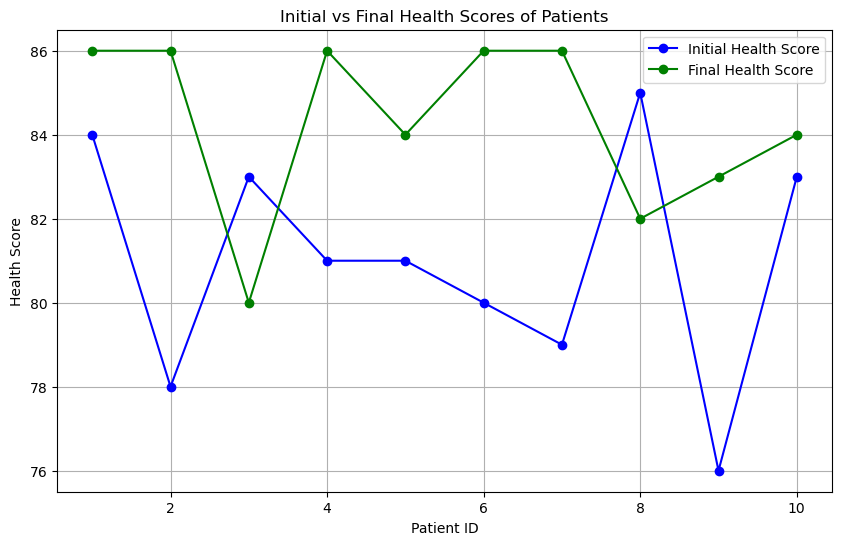

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the DataFrame
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Plot the initial and final health scores for comparison
plt.figure(figsize=(10, 6))
plt.plot(df['PatientID'], df['InitialHealthScore'], marker='o', label='Initial Health Score', color='blue')
plt.plot(df['PatientID'], df['FinalHealthScore'], marker='o', label='Final Health Score', color='green')

plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs Final Health Scores of Patients')
plt.legend()
plt.grid(True)
plt.show()

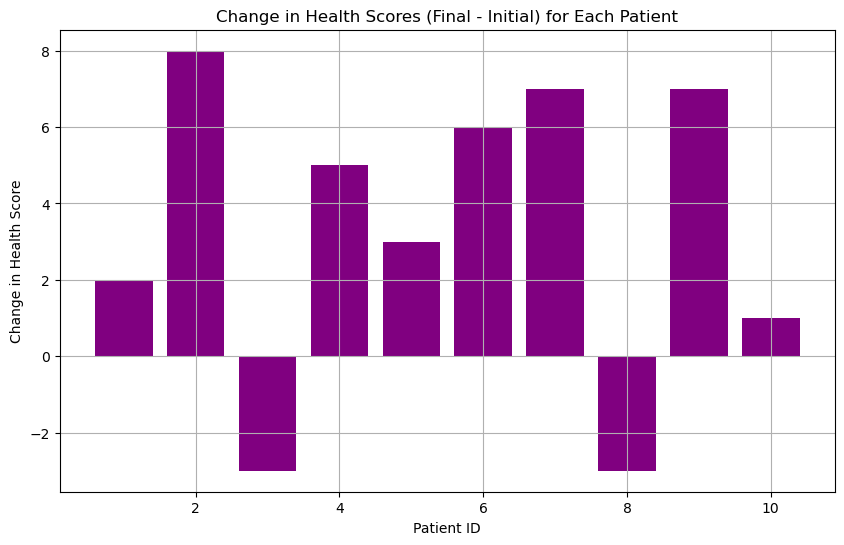

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the DataFrame
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the change in health scores
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Plot the health score changes
plt.figure(figsize=(10, 6))
plt.bar(df['PatientID'], df['HealthScoreChange'], color='purple')
plt.xlabel('Patient ID')
plt.ylabel('Change in Health Score')
plt.title('Change in Health Scores (Final - Initial) for Each Patient')
plt.grid(True)
plt.show()

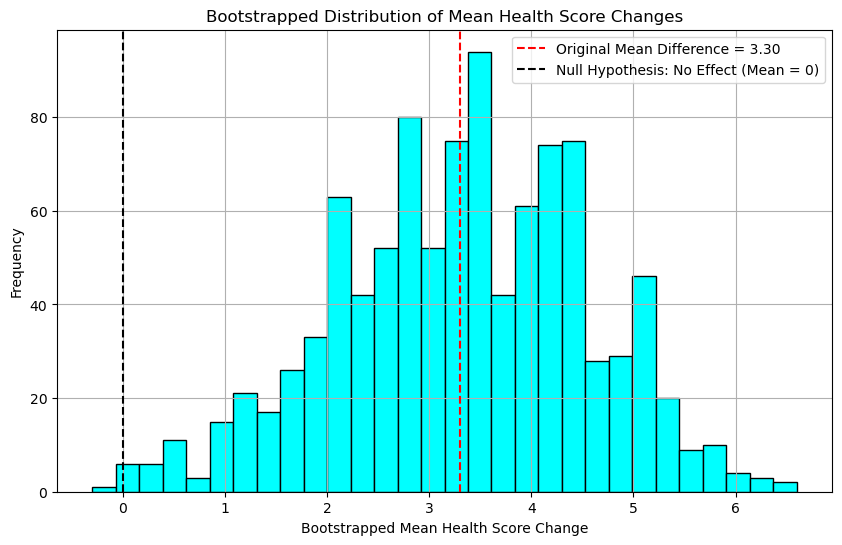

In [5]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
n_bootstrap = 1000

# Original mean difference
mean_diff_original = df['HealthScoreChange'].mean()

# Bootstrapping: resample data and compute mean health score change
bootstrap_means = []
for _ in range(n_bootstrap):
    bootstrap_sample = df['HealthScoreChange'].sample(frac=1, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())

# Convert to a numpy array for further calculations
bootstrap_means = np.array(bootstrap_means)

# Plot the distribution of bootstrapped means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='cyan', edgecolor='black')
plt.axvline(mean_diff_original, color='red', linestyle='--', label=f"Original Mean Difference = {mean_diff_original:.2f}")
plt.axvline(0, color='black', linestyle='--', label="Null Hypothesis: No Effect (Mean = 0)")
plt.xlabel('Bootstrapped Mean Health Score Change')
plt.ylabel('Frequency')
plt.title('Bootstrapped Distribution of Mean Health Score Changes')
plt.legend()
plt.grid(True)
plt.show()

2:
We use the "standard error of the mean" (SEM) to build a 95% confidence interval under the assumption that the bootstrapped sample means are normally distributed. How far the sample means deviate from the actual population mean is indicated by the SEM.

By taking the mean of the bootstrapped sample means and multiplying the result by 1.96 times the SEM, one may compute a 95% confidence interval. The normal distribution's characteristics, which show that 95% of values fall within 1.96 standard deviations of the mean, account for the 1.96 value.

The confidence interval is, to put it briefly,

The bootstrap mean ± 1.96 × SEM
Bootstrap mean average ±1.96×SEM
Approximately 95% of the bootstrapped sample means will be covered by this interval.

3:
The distribution of bootstrapped sample means is directly used to generate a 95% bootstrapped confidence interval without the need for the standard error. How to do it is as follows:

Arrange the bootstrapped means in a positive spiral.
Eliminate the lowest 2.5% and highest 2.5% of values in order to capture the middle 95%.
The confidence interval is made up of the remaining middle 95% of the bootstrapped means.
Stated differently, use the 97.5th percentile (beyond which 2.5% fall) and the 2.5th percentile (below which 2.5% of the bootstrapped means fall). Based directly on the bootstrapped means, this range represents the 95% confidence interval.

4:
The 95% bootstrap confidence intervals are:

For the population mean: 
[79.2, 82.6]
For the population median: 
[79.0,83.5]
How to modify the code:
For the mean: The code calculates the confidence interval by using np.mean(bootstrap_sample) in each iteration. To produce a confidence interval for the mean, the key step is storing the sample mean in the bootstrap_means list.

For other parameters (like the median): The same process is applied, but you store the sample median using np.median(bootstrap_sample) in a different list (bootstrap_medians in this case).

You can extend this to calculate confidence intervals for other population parameters like the standard deviation or mode by changing the function inside the loop (e.g., np.std(bootstrap_sample) for standard deviation). 

5:
We distinguish between the sample statistic and the population parameter because the latter is what we compute from a sample (such as the sample mean) in order to estimate the parameter, whereas the former is the true, unknown value we wish to estimate.

Confidence intervals provide a range that we think represents the true population parameter based on the sample statistic. Sample to sample variation is possible, but the population parameter never changes. This distinction allows us to correctly interpret the confidence interval, which, depending on our sample, gives a range of likely values for the population parameter.

7:
A confidence interval overlapping zero means that zero is a possible value for the true population parameter. In hypothesis testing, the null hypothesis (H₀) states there is no effect, meaning the population parameter is zero. If zero falls within the confidence interval, we cannot reject the null hypothesis because the data doesn't provide strong enough evidence to say that the effect is definitely different from zero.

Even if the sample mean isn't zero, the uncertainty in the data (reflected in the width of the confidence interval) could still allow for no effect, so we "fail to reject" H₀.

On the other hand, we would reject the null hypothesis if the confidence interval does not overlap zero. This would mean that zero is not a plausible value for the population parameter, indicating that the drug likely has an effect (either positive or negative).